In [1]:
import pandas as pd
from datetime import datetime
from icecream import ic
import json
import networkx as nx
import torch_geometric.utils as utils
import matplotlib.pyplot as plt

In [2]:
folder_path = "../datasets/"
file_name = "AMAZON_FASHION.json"

In [3]:
with open(folder_path + file_name) as f:
    # read json file to dict
    data = f.read()
    reviews = []

    # Split JSON data into lines and load each line as JSON
    for line in data.split('\n'):
        if line.strip():  # Check if line is not empty
            review = json.loads(line)
            reviews.append(review)  # Use reviewerID as key

data = pd.json_normalize(reviews)#, "style", ['Size', 'Color'])
ic(len(data))
data.head()

ic| len(data): 883636


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,style.Team Name:,style.Style Name:,style.Format:,style.Package Quantity:,style.Material:,style.Item Display Length:,style.Gem Type:,style.Item Package Quantity:,style.Scent Name:,style.Shape:
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#group by asin
grouped = data.groupby('asin')
ic(len(grouped))
grouped.head()
ic(data['asin'].nunique())

ic| len(grouped): 186189
ic| data['asin'].nunique(): 186189


186189

In [5]:
# group by reviewerID
grouped = data.groupby('reviewerID')
ic(len(grouped))
grouped.head()
# count unique reviewerID
ic(data['reviewerID'].nunique())

ic| len(grouped): 749233
ic| data['reviewerID'].nunique(): 749233


749233

In [6]:
# convert reviewTime from M D,Y to datetime (POSIX time)
#timestamp_format = '%m %d, %Y'
#format_fn = lambda x: int(datetime.strptime(x, timestamp_format).timestamp())
#data['reviewTime'] = data['reviewTime'].apply(format_fn)
#data['reviewTime'] = pd.to_datetime(data['reviewTime'], format='%m %d, %Y')
# rename src and dest
data.rename(columns={'reviewerID': 'From ID', 'asin': 'To ID'}, inplace=True)
# style column is a json object, convert each key to a column

ic(data.tail())
data

ic| data.tail():         overall  verified   reviewTime         From ID       To ID  \
                 883631      5.0      True  02 21, 2017  A1ZSB2Q144UTEY  B01HJHTH5U   
                 883632      5.0      True  11 25, 2016  A2CCDV0J5VB6F2  B01HJHTH5U   
                 883633      3.0      True  11 10, 2016  A3O90PACS7B61K  B01HJHTH5U   
                 883634      3.0      True  11 10, 2016  A2HO94I89U3LNH  B01HJHF97K   
                 883635      5.0      True   08 9, 2016  A2RSX9E79DUHRX  B01HJG5NMW   
                 
                                reviewerName  \
                 883631      Amazon Customer   
                 883632      Amazon Customer   
                 883633             Fabfifty   
                 883634               Mgomez   
                 883635  Natasha Mascarenhas   
                 
                                                                reviewText  \
                 883631  I absolutely love this dress!!  It's sexy and ...  

,overall,verified,reviewTime,From ID,To ID,reviewerName,reviewText,summary,unixReviewTime,vote,...,style.Team Name:,style.Style Name:,style.Format:,style.Package Quantity:,style.Material:,style.Item Display Length:,style.Gem Type:,style.Item Package Quantity:,style.Scent Name:,style.Shape:
0,5.0,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5.0,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883632,5.0,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883633,3.0,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883634,3.0,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# store the data in a csv file
data.to_csv(folder_path + file_name + ".csv", index=False)

In [8]:
with open(folder_path + file_name + ".csv") as f:
    preprocessed_data = pd.read_csv(f)
ic(preprocessed_data.head())
ic(len(preprocessed_data))

C:\Users\Efe\AppData\Local\Temp\ipykernel_33924\87688146.py:2: DtypeWarning: Columns (13,14,16,17,18,19,21,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  preprocessed_data = pd.read_csv(f)
ic| preprocessed_data.head():    overall  verified   reviewTime         From ID       To ID  reviewerName  \
                              0      5.0      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
                              1      2.0      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
                              2      4.0     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
                              3      2.0      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
                              4      3.0     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   
                              
                                                                        reviewText  \
 

883636

In [9]:
# create an edge list out of preproccessed_data using From ID and To ID
edge_index = preprocessed_data[['From ID', 'To ID']]
ic(len(edge_index))
ic(edge_index.head())

ic| len(edge_index): 883636
ic| edge_index.head():           From ID       To ID
                       0  A1D4G1SNUZWQOT  7106116521
                       1  A3DDWDH9PX2YX2  7106116521
                       2  A2MWC41EW7XL15  7106116521
                       3  A2UH2QQ275NV45  7106116521
                       4   A89F3LQADZBS5  7106116521


,From ID,To ID
0,A1D4G1SNUZWQOT,7106116521
1,A3DDWDH9PX2YX2,7106116521
2,A2MWC41EW7XL15,7106116521
3,A2UH2QQ275NV45,7106116521
4,A89F3LQADZBS5,7106116521


ic| reviewer_review_count.head(): From ID
                                  A3G5KDMFNRUXHB    40
                                  A3JBQHQZEZPQK4    36
                                  A1RRX286ZRI830    32
                                  A2PBHVTPTIIGKR    31
                                  A2GP4EJIAA2OE0    29
                                  Name: count, dtype: int64


<Axes: >

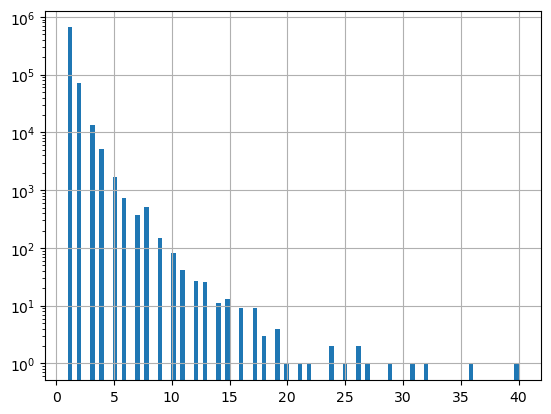

In [10]:
# histogram of the number of reviews per reviewer
reviewer_review_count = preprocessed_data['From ID'].value_counts()
ic(reviewer_review_count.head())
# depict the histogram in log scale
reviewer_review_count.hist(bins=100, log=True)

ic| product_review_count.head(): To ID
                                 B000V0IBDM    4384
                                 B000KPIHQ4    4375
                                 B00I0VHS10    3889
                                 B00RLSCLJM    3638
                                 B000PHANNM    2572
                                 Name: count, dtype: int64


<Axes: >

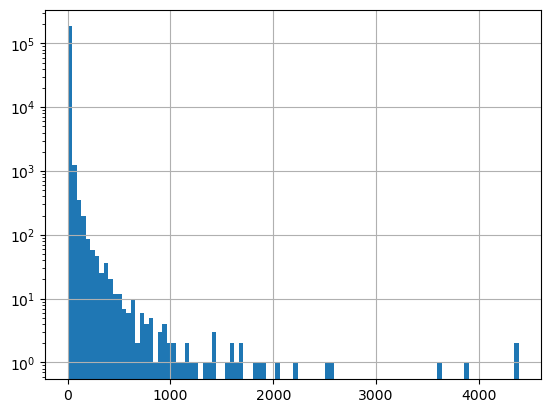

In [11]:
# histogram of the number of reviews per product
product_review_count = preprocessed_data['To ID'].value_counts()
ic(product_review_count.head())
# depict the histogram in log scale
product_review_count.hist(bins=100, log=True)

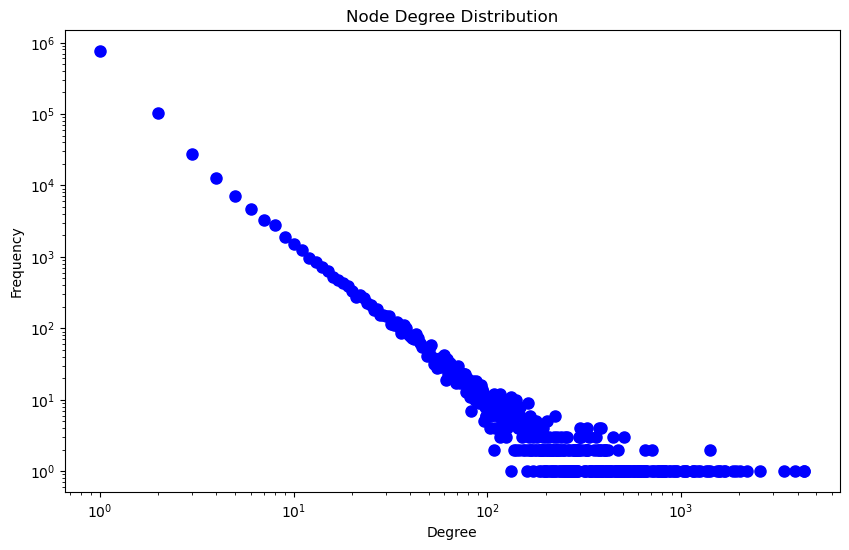

In [14]:
# Create a bipartite graph
G = nx.Graph()
G.add_nodes_from(edge_index['From ID'], bipartite=0)
G.add_nodes_from(edge_index['To ID'], bipartite=1)
G.add_edges_from([(row['From ID'], row['To ID']) for idx, row in edge_index.iterrows()])

degrees = pd.Series([val for (node, val) in G.degree()])
degree_counts = degrees.value_counts()
plt.figure(figsize=(10, 6))
plt.loglog(degree_counts.index, degree_counts.values, marker='o', linestyle='None', markersize=8, color='b')
plt.title('Node Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

Missing values in each column:
 overall                              0
verified                             0
reviewTime                           0
From ID                              0
To ID                                0
reviewerName                        92
reviewText                        1233
summary                            533
unixReviewTime                       0
vote                            803736
style.Color:                    621317
style.Size:                     659144
image                           854829
style.Metal Type:               881961
style.Size Name:                879694
style.Style:                    871988
style.Length:                   882211
style.Team Name:                883438
style.Style Name:               883450
style.Format:                   883550
style.Package Quantity:         883588
style.Material:                 883632
style.Item Display Length:      883632
style.Gem Type:                 883605
style.Item Package Quantity:    

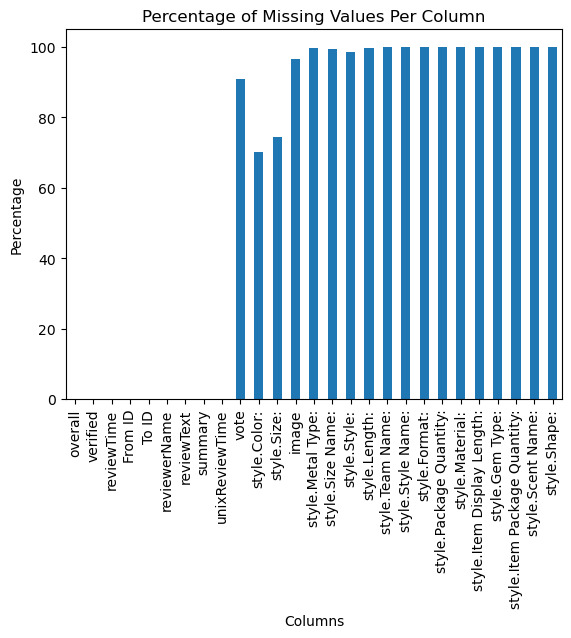

In [15]:
#num/percentage of missing data
missing_values = data.isna().sum()
print("Missing values in each column:\n", missing_values)
missing_percentage = (data.isna().sum() / len(data)) * 100
print("Percentage of missing values in each column:\n", missing_percentage)

missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values Per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.show()

In [16]:
import torch
from torch_geometric.data import Data

# create node mapping for reviewerID and asin
node_mapping = {}
edges = []
for reviewer, product in edge_index.values:
    if reviewer not in node_mapping:
        node_mapping[reviewer] = len(node_mapping)
    if product not in node_mapping:
        node_mapping[product] = len(node_mapping)
    edges.append([node_mapping[reviewer], node_mapping[product]])

# Convert edge_index to PyTorch tensor
edge_index_tensor = torch.tensor(edges, dtype=torch.long).t().contiguous()

data = Data(edge_index=edge_index_tensor)
ic(data.num_nodes)
ic(data.num_edges)
ic(data.is_directed())

C:\Users\Efe\anaconda3\envs\cse3000\lib\site-packages\torch_geometric\data\storage.py:450: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(
ic| data.num_nodes: 935422
ic| data.num_edges: 883636
ic| data.is_directed(): True


True

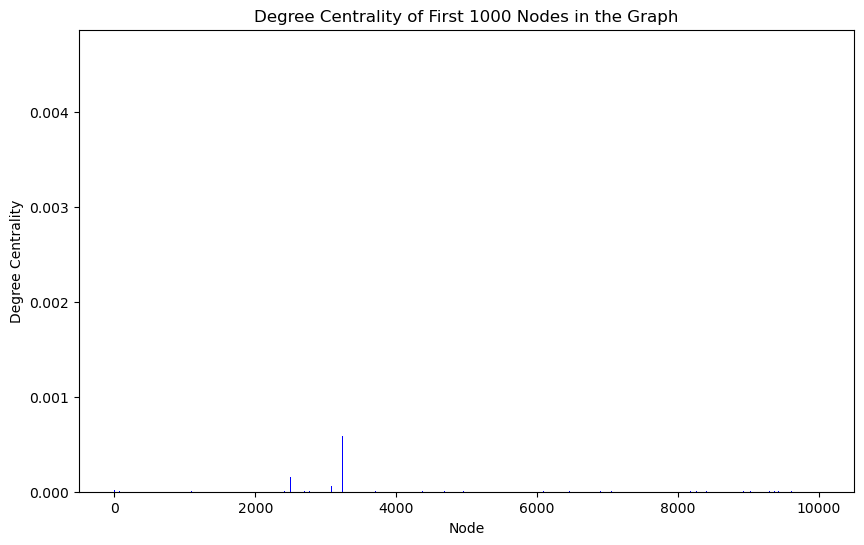

In [17]:
if 'edge_index' in data:
    G = utils.to_networkx(data, to_undirected=True)
    #ic(list(G.nodes(data=True))[0:1000:None])
    degree_centrality = nx.degree_centrality(G)

    # Limit the nodes to the first 1000 for computational feasibility
    limited_nodes = list(degree_centrality.keys())[:10000]
    limited_centralities = [degree_centrality[node] for node in limited_nodes]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(limited_nodes, limited_centralities, color='b')
    plt.xlabel('Node')
    plt.ylabel('Degree Centrality')
    plt.title('Degree Centrality of First 1000 Nodes in the Graph')
    plt.show()